# **Using pandas read_html to Web Scrape Data for Data Science** 

In this Jupyter notebook, I will web scrape data using pandas read_html() function for the NBA player stats data and perform a quick data exploration.

## **URL to the webpage "2017-18 NBA Player Stats: Per Game"**

Modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [1]:
# The Building Blocks
year = '2018'
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the URL + year strings together
url = str.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2018_per_game.html'

Now, let's programmatically return a list of URL given a list of years (e.g. 2015,2016,2017,2018).

In [2]:
years = [2015,2016,2017,2018]
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = str.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html


## **Read HTML webpage into pandas**

In [3]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [5]:
df = pd.read_html(url, header = 0) #defining that the header is the first row
df

[      Rk         Player Pos Age   Tm   G  GS    MP   FG  FGA  ...   FT%  ORB  \
 0      1   Álex Abrines  SG  24  OKC  75   8  15.1  1.5  3.9  ...  .848  0.3   
 1      2     Quincy Acy  PF  27  BRK  70   8  19.4  1.9  5.2  ...  .817  0.6   
 2      3   Steven Adams   C  24  OKC  76  76  32.7  5.9  9.4  ...  .559  5.1   
 3      4    Bam Adebayo   C  20  MIA  69  19  19.8  2.5  4.9  ...  .721  1.7   
 4      5  Arron Afflalo  SG  32  ORL  53   3  12.9  1.2  3.1  ...  .846  0.1   
 ..   ...            ...  ..  ..  ...  ..  ..   ...  ...  ...  ...   ...  ...   
 685  537   Tyler Zeller   C  28  BRK  42  33  16.7  3.0  5.5  ...  .667  1.5   
 686  537   Tyler Zeller   C  28  MIL  24   1  16.9  2.6  4.4  ...  .895  2.0   
 687  538    Paul Zipser  SF  23  CHI  54  12  15.3  1.5  4.3  ...  .760  0.2   
 688  539     Ante Žižić   C  21  CLE  32   2   6.7  1.5  2.1  ...  .724  0.8   
 689  540    Ivica Zubac   C  20  LAL  43   0   9.5  1.4  2.8  ...  .765  1.0   
 
      DRB  TRB  AST  STL  

### How many tables are there in the webpage?

In [9]:
# Finding out how many tables are in the web page in case there are more than one
len(df)

1

### Select the first table

In [7]:
df[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,537,Tyler Zeller,C,28,BRK,42,33,16.7,3.0,5.5,...,.667,1.5,3.1,4.6,0.7,0.2,0.5,0.8,1.9,7.1
686,537,Tyler Zeller,C,28,MIL,24,1,16.9,2.6,4.4,...,.895,2.0,2.7,4.6,0.8,0.3,0.6,0.5,2.0,5.9
687,538,Paul Zipser,SF,23,CHI,54,12,15.3,1.5,4.3,...,.760,0.2,2.2,2.4,0.9,0.4,0.3,0.8,1.6,4.0
688,539,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7


In [8]:
df2018 = df[0]

In [13]:
df2018.shape

(690, 30)

## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [10]:
# Getting all the headers in the table using the "age" string
df2018[df2018.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
20,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
47,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
73,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
98,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
127,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
152,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
175,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
202,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
225,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
252,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [11]:
# There are 26 headers
len(df2018[df2018.Age == 'Age'])

26

In [14]:
# Dropping all the other headers
df = df2018.drop(df2018[df2018.Age == 'Age'].index)

In [15]:
df.shape

(664, 30)

## Quick Exploratory Data Analysis

In [16]:
import seaborn as sns

Making the histogram

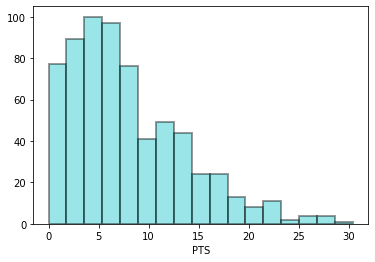

In [19]:
sns.distplot(df.PTS,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')